In [ ]:
# importing packages and dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
from google.colab import drive
df = pd.read_csv(r'/content/Resume.csv')
df_updated = pd.read_csv(r'/content/resumes_updated.csv')
df2 = pd.read_csv(r'/content/Resume.csv')

In [ ]:
######## Years of Tenure Part


# function to implement to the dataframe for everyone

#function that converts string to have month/year be the same format
def convert_month_year_to_mm_yyyy(text):
    # Dictionary to map month abbreviations to full names
    month_mapping = {
        'Jan': 'January', 'Feb': 'February', 'Mar': 'March', 'Apr': 'April', 'May': 'May', 'Jun': 'June',
        'Jul': 'July', 'Aug': 'August', 'Sep': 'September', 'Oct': 'October', 'Nov': 'November', 'Dec': 'December'
    }

    # Find all "month year" dates in the text
    pattern = r"(\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b|\b[a-zA-Z]+\b) (\d{4})"
    matches = re.findall(pattern, text)

    # Handle "Current" separately
    for i, (month, year) in enumerate(matches):
        if month.lower() == "current":
            matches[i] = ("08", "2021")

    # Convert "month year" to "MM/YYYY" format
    for i, (month, year) in enumerate(matches):
        month_full = month_mapping.get(month, month)

        try:
            # Check if the extracted text is a valid month
            datetime.strptime(month_full, '%B')
            converted_date = f"{datetime.strptime(month_full, '%B').strftime('%m')}/{year}"
            text = text.replace(f"{month} {year}", converted_date)

        except ValueError:
            continue  # Skip invalid month names

    return text

# function that calculates the years of work experience
def calculate_work_experience_tenure(text):
    # Replace any instance of the word "Current" with the date "08/2021"
    text = text.replace("Current", "08/2021")

    # Find all "MM/YYYY" dates in the text
    pattern = r"(\d{2}/\d{4})"
    matches = re.findall(pattern, text)

    tenure_days_list = []

    # Iterate over pairs of consecutive matches
    for i in range(0, len(matches) - 1, 2):
        try:
            current_date = datetime.strptime(matches[i], "%m/%Y")
            next_date = datetime.strptime(matches[i + 1], "%m/%Y")

            # Check if the dates are within the desired range
            if 1960 <= current_date.year <= 2024 and 1960 <= next_date.year <= 2024:
                # Check if the dates are close to each other
                if abs(matches.index(matches[i + 1]) - matches.index(matches[i])) <= 5:
                    tenure_days_list.append(abs((next_date - current_date)).days)  # Take absolute value of difference

        except ValueError:
            # Handle cases where the date format is not '%m/%Y'
            continue

    return (sum(tenure_days_list) / 365)

# function that applies it to the dataframe
def main_function(df):
    # Apply the functions to the 'Resume_str' column
    df['Resume_str_MMYYYY'] = df['Resume_str'].apply(convert_month_year_to_mm_yyyy)
    df['work_experience_tenure'] = df['Resume_str_MMYYYY'].apply(calculate_work_experience_tenure)

    # Manual fixing for specific rows
    df.at[1147, 'work_experience_tenure'] = 17.18082191780822
    df.at[1877, 'work_experience_tenure'] = 52.28493150684932
    df.at[202, 'work_experience_tenure'] = 20.843835616438355
    df.at[208, 'work_experience_tenure'] = 35.93424657534246
    df.at[418, 'work_experience_tenure'] = 27.517808219178082
    df.at[528, 'work_experience_tenure'] = 66.37534246575342
    df.at[896, 'work_experience_tenure'] = 39.43835616438356
    df.at[1096, 'work_experience_tenure'] = 32.441095890410956
    df.at[1272, 'work_experience_tenure'] = 50.11506849315069
    df.at[1328, 'work_experience_tenure'] = 40.276712328767125
    df.at[1472, 'work_experience_tenure'] = 48.964383561643835
    df.at[1536, 'work_experience_tenure'] = 15.761643835616438
    df.at[1658, 'work_experience_tenure'] = 27.101369863013698
    df.at[1751, 'work_experience_tenure'] = 24.5972602739726
    df.at[1875, 'work_experience_tenure'] = 21.594520547945205
    df.at[2321, 'work_experience_tenure'] = 27.523287671232875
    df.at[2389, 'work_experience_tenure'] = 35.44931506849315
    df.at[2401, 'work_experience_tenure'] = 32.35616438356164
    df.at[2420, 'work_experience_tenure'] = 23.183561643835617
    df.at[2475, 'work_experience_tenure'] = 43.61095890410959

    return df



# z-score calculator
from scipy.stats import zscore
df['Resume_str_MMYYYY'] = df['Resume_str'].apply(convert_month_year_to_mm_yyyy)
df['work_experience_tenure'] = df['Resume_str_MMYYYY'].apply(calculate_work_experience_tenure)

df['work_experience_tenure_zscore'] = zscore(df['work_experience_tenure'])
df['work_experience_tenure'].mean()

20.073518187633734

In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,university,in_top_university,Resume_str_MMYYYY,work_experience_tenure,work_experience_tenure_zscore
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,Jefferson College Skills Accounting,False,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,20.682192,0.046425
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,nan,False,"HR SPECIALIST, US HR OPERATIONS ...",11.586301,-0.647341
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,Friends University,True,HR DIRECTOR Summary Over 2...,23.936986,0.294676
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,nan,False,HR SPECIALIST Summary Dedica...,5.928767,-1.078855
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,nan,False,HR MANAGER Skill Highlights ...,18.591781,-0.113016


In [ ]:
!pip install fuzzywuzzy
!pip install rapidfuzz
import re
import spacy
from fuzzywuzzy import fuzz

university_keywords = ['university', 'college', 'institute', 'academy', 'polytechnic']
nlp = spacy.load("en_core_web_sm")

def find_university(resume):
    pattern = r'(\w+\s+)?(\w+\s+)?(\w+\s+)?(university|college|institute|academy|polytechnic)(\s+\w+)?(\s+\w+)?(\s+\w+)'
    possible_universities = re.findall(pattern, resume, re.IGNORECASE)

    joined_matches = [' '.join(match) for match in possible_universities]
    find_string = ' '.join(joined_matches)
    cleaned_items = [re.sub(r'\s+', ' ', item).strip() for item in joined_matches]

    universities = []
    for item in cleaned_items:
        doc = nlp(item)
        for ent in doc.ents:
            if ent.label_ == "ORG":
                universities.append(ent)
    universities = [org for org in universities if any(keyword in str(org).lower() for keyword in university_keywords)]
    if len(universities) == 0:
        return np.nan
    return min(universities, key=len)

def find_university_1(resume):
    orgs = []
    doc = nlp(resume)
    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent)
    universities = [org for org in orgs if any(keyword in str(org).lower() for keyword in university_keywords)]
    if len(universities) == 0:
        return np.nan
    university = str(min(universities, key=len))
    return extract_university_name(university)

def find_university_aggregated(resume):
    uni = find_university(resume)
    if uni == np.nan:
        return find_university_1(resume)
    return str(uni)

resume_universities = df['Resume_str'].apply(find_university_aggregated)
df['university'] = resume_universities

# second part
universities = pd.read_csv("cwurData.csv")
unis = universities['institution'].unique()
uni_arrays = set(unis)

similarity_threshold = 75
def is_similar(item, search_list, threshold):
    return any(fuzz.ratio(item, target) >= threshold for target in search_list)
is_in_top_universities = [is_similar(item, uni_arrays, similarity_threshold) for item in resume_universities]

df['in_top_university'] = is_in_top_universities

df['in_top_university']


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


0       False
1       False
2        True
3       False
4       False
        ...  
2479    False
2480     True
2481    False
2482    False
2483    False
Name: in_top_university, Length: 2484, dtype: bool

In [ ]:
from bs4 import BeautifulSoup


def extract_recent_job_title(html):
    soup = BeautifulSoup(html, 'html.parser')

    # Find all job entries within the work experience section
    job_entries = soup.find_all('div', {'class': 'paragraph'})

    # Initialize variables to store job title and duration
    most_recent_job_title = None
    most_recent_duration = None

    # Iterate through each job entry to find the most recent one
    for job_entry in job_entries:
        # Extract job title
        job_title_element = job_entry.find('span', {'class': 'jobtitle'})
        if job_title_element:
            most_recent_job_title = job_title_element.text.strip()

            # Extract duration
            dates_element = job_entry.find('span', {'class': 'jobdates'})
            if dates_element:
                most_recent_duration = dates_element.text.strip()

            # Break after finding the most recent job entry
            break

    # Return the most recent job title and duration
    return most_recent_job_title if most_recent_job_title else "Job Title Not Found"
job_positions = []

# Iterate over the first 100 rows of the DataFrame
for index, row in df.iterrows():
    html_code = row['Resume_html']

    # Extract job title and duration
    result = extract_recent_job_title(html_code)

    # Append job title to the list
    job_title = result
    job_positions.append(job_title)
job_positions_lower = [job.lower() for job in job_positions]

df['most_recent_job'] = job_positions_lower


import matplotlib.pyplot as plt
from collections import Counter

def categorize_word(word):
    high_ranking = ['manager', 'director', 'specialist', 'executive', 'lead']
    medium_ranking = [ 'accountant', 'consultant', 'coordinator', 'representative', 'technician', 'analyst', 'representative', 'project', 'operations', 'engineer']
    low_ranking = ['teacher','intern', 'associate', 'assistant', 'technician', 'service', 'relations', 'sales']

    if any(w in word.lower() for w in high_ranking):
        return 'High'
    elif any(w in word.lower() for w in medium_ranking):
        return 'Medium'
    elif any(w in word.lower() for w in low_ranking):
        return 'Low'
    else:
        return 'Other'


In [ ]:

# making a 'Skills' column that contains a string or skills separated by commas

import ast
df['Skills'] = df_updated['Resume_sections'].apply(lambda x: ', '.join(' '.join(section.get('paragraphs', [])) for section in ast.literal_eval(x).values() if section.get('title', '') == 'Skills'))
df.head()

relevant_skills_dict = {
    'HR': [
        "Communication", "Verbal", "Interpersonal", "Listening", "Sourcing", "Interviewing", "Branding",
        "Onboarding", "Conflict resolution", "Mediation", "Engagement", "Diversity", "HR software", "Data analysis",
        "Automation", "HRIS", "Benchmarking", "Benefits", "Compensation", "Payroll", "Employment laws",
        "Compliance", "Legal documentation", "Training", "Employee development", "Learning management systems",
        "Goal-setting", "Performance reviews", "Feedback", "Coaching", "Change management", "Succession planning",
        "Culture development", "Critical thinking", "Analytical skills", "Confidentiality", "Ethical standards",
        "Professional relationships", "Networking", "Adaptability", "Flexibility", "Prioritization", "Deadlines",
        "Customer service", "Support", "Strategy alignment", "Business strategy", "Project management", "Negotiation",
        "Influencing decisions"
    ],
    'DESIGNER': [
    "Adobe Creative Suite", "Photoshop", "Illustrator", "InDesign", "PowerPoint", "CorelDRAW", "Sketch",
    "HTML", "CSS", "JavaScript", "Responsive design", "UI/UX design",
    "Font selection", "Typography", "Color theory", "Grid systems",
    "Visual hierarchy", "Balance", "Symmetry", "Hand-drawing",
    "Digital illustration", "Vector art", "Composition",
    "Lighting techniques", "Photo editing", "Logo design",
    "Brand guidelines", "Consistent branding", "Wireframing",
    "Prototyping", "Usability testing", "Animation",
    "Video editing", "After Effects", "3D software",
    "3D rendering", "3D animation", "Problem-solving",
    "Design thinking", "Client communication", "Presentation",
    "Collaboration", "Pixel-perfect design", "Precision",
    "Trends", "Learning new tools", "Meeting deadlines",
    "Project management", "Teamwork", "Feedback",
    "Prepress", "Print production", "Design-related tools",
    "Software proficiency", "Creativity", "Passion",
    "Attention to Detail", "Adaptability", "Communication skills",
    "Time management", "Organization", "Problem-solving",
    "Critical thinking", "Attention to detail", "Interpersonal skills",
    "Empathy", "Analytical skills", "Decision-making",
    "Collaboration", "Presentation skills", "Team management"
    ],
    'INFORMATION-TECHNOLOGY': [
        "Python", "Java", "JavaScript", "C++", "PowerShell", "Shell scripting", "HTML", "CSS", "React", "Angular",
        "Vue.js", "Node.js", "Django", "Flask", "SQL", "MySQL", "PostgreSQL", "MongoDB", "TCP/IP", "Network security",
        "Wireless networking", "SSL/TLS", "Firewalls", "Intrusion Detection Systems", "Security audits", "AWS", "Azure",
        "Google Cloud Platform", "Cloud architecture", "Linux", "Windows Server", "macOS", "Server administration",
        "Active Directory", "Group Policy", "Virtualization", "CI/CD", "Git", "Containerization", "Infrastructure as Code",
        "Troubleshooting", "End-user support", "Ticketing systems", "Remote support tools", "Ruby", "Agile methodologies",
        "Scrum", "Jira", "Database design", "Database optimization", "Service management", "Communication", "Problem-solving",
        "Critical thinking", "Adaptability", "CompTIA", "CCNA", "CISSP", "AWS certifications", "Azure certifications",
        "Data analysis tools", "Data visualization tools", "Machine learning", "TensorFlow", "PyTorch", "Android development",
        "iOS development", "Collaboration tools"
    ],
    'TEACHER': [
        "Curriculum development", "Classroom management", "Learning styles", "Communication", "Parent-teacher collaboration",
        "Flexibility", "Subject matter expertise", "Continuous learning", "Technology integration", "Assessment",
        "Feedback", "Collaboration", "Special needs", "Cultural competence", "Building relationships", "Problem-solving",
        "Time management", "Leadership", "Extracurricular involvement", "Professional development", "First aid",
        "Classroom technology", "Team building"
    ],
    'ADVOCATE': [
        "Communication", "Listening", "Empathy", "Negotiation", "Conflict resolution", "Public speaking", "Research",
        "Critical thinking", "Problem-solving", "Strategic planning", "Networking", "Crisis intervention",
        "Community outreach", "Legal research", "Policy analysis", "Social issues", "Emotional intelligence",
        "Cross-cultural competence", "Team collaboration", "Advocacy campaign", "Media relations", "Event planning",
        "Time management", "Decision-making", "Public relations", "Persuasion", "Writing", "Information gathering",
        "Conflict management", "Multilingual proficiency", "Resourcefulness", "Adaptability", "Community organizing",
        "Digital advocacy", "Grassroots organizing", "Strategic communication", "Stakeholder collaboration",
        "Monitoring and evaluation", "Sensitivity", "Leadership", "Resilience", "Social justice", "Networking",
        "Grant writing", "Lobbying", "Policy advocacy", "Campaign strategy", "Legislative processes", "Budget management",
        "Trauma-informed care", "Public education"
    ],
    'BUSINESS-DEVELOPMENT': [
        "Sales", "Negotiation", "Communication", "Marketing", "Networking", "Lead generation", "Client acquisition",
        "Market research", "Strategic planning", "Relationship management", "Customer service", "Presentation",
        "Proposal writing", "Contract negotiation", "Account management", "Forecasting", "Budgeting", "Analysis",
        "Competitive analysis", "Product development", "Team collaboration", "Goal-setting", "Problem-solving",
        "Adaptability", "Time management", "Decision-making", "CRM systems", "Project management", "Stakeholder engagement",
        "Closing deals", "Cross-selling", "Upselling", "Consultative selling", "Customer retention", "Revenue growth",
        "Target setting", "Risk management", "Business intelligence", "Partnership building", "E-commerce", "Finance",
        "Business process improvement", "Lead qualification", "Cold calling", "Social media marketing", "SEO", "SEM",
        "Content marketing", "Market segmentation", "Value proposition", "Branding", "Public speaking", "Event planning"
    ],
    'HEALTHCARE': [
        "Patient care", "Medical terminology", "Clinical skills", "Empathy", "Communication", "Interpersonal skills",
        "Teamwork", "Problem-solving", "Attention to detail", "Time management", "Adaptability", "Critical thinking",
        "Organizational skills", "Compassion", "Patient advocacy", "Ethical standards", "Decision-making",
        "Patient education", "Stress management", "Medical records management", "Cultural competence", "Medication administration",
        "Infection control", "Quality improvement", "Documentation", "Emergency response", "Diagnostic procedures",
        "Treatment planning", "Wound care", "Health promotion", "Safety protocols", "Collaboration", "Leadership",
        "Professionalism", "Technology proficiency", "Continuing education", "Compliance", "Privacy", "Confidentiality",
        "Empathetic listening", "End-of-life care", "Patient assessment", "Health assessments", "Discharge planning",
        "Home care", "Long-term care", "Acute care", "Chronic disease management", "Preventive care", "Rehabilitation"
    ],
    'FITNESS': [
        "Personal training", "Exercise science", "Nutrition", "Anatomy", "Physiology", "Fitness assessment", "Goal-setting",
        "Program design", "Workout planning", "Strength training", "Cardiovascular training", "Flexibility training",
        "Endurance training", "Core training", "Mobility training", "Rehabilitation exercises", "Injury prevention",
        "Client motivation", "Progress tracking", "Client education", "Health coaching", "Group fitness instruction",
        "Weight management", "Body composition analysis", "Functional movement", "Sport-specific training", "Mind-body connection",
        "Stress management", "Recovery techniques", "Hydration strategies", "Sleep optimization", "Lifestyle coaching",
        "Behavior change", "Motivational interviewing", "Exercise prescription", "Equipment use", "Safety guidelines",
        "Professionalism", "Communication", "Client rapport", "Networking", "Business management", "Marketing",
        "Social media presence", "Continuing education", "Certifications", "Industry trends", "Legal regulations"
    ],
    'AGRICULTURE': [
        "Crop management", "Soil science", "Plant nutrition", "Pest management", "Crop rotation", "Irrigation",
        "Harvesting", "Seeding", "Weed control", "Disease control", "Fertilization", "Genetic engineering",
        "Greenhouse management", "Livestock management", "Animal nutrition", "Breeding", "Healthcare", "Herd management",
        "Milking", "Fencing", "Feed management", "Grain storage", "Equipment operation", "Safety procedures",
        "Land management", "Environmental conservation", "Sustainability practices", "Farm budgeting", "Market analysis",
        "Risk management", "Regulatory compliance", "Business planning", "Marketing", "Sales", "Supply chain management",
        "Quality control", "Research", "Data analysis", "Problem-solving", "Communication", "Teamwork", "Leadership",
        "Adaptability", "Critical thinking", "Continuous learning", "Community involvement", "Professionalism"
    ],
    'BPO': [
        "Customer service", "Communication", "Problem-solving", "Adaptability", "Time management", "Attention to detail",
        "Active listening", "Teamwork", "Multitasking", "Client relationship management", "Call handling", "Inbound calls",
        "Outbound calls", "Technical support", "Sales support", "Order processing", "Complaint resolution", "Escalation handling",
        "Quality assurance", "Data entry", "Documentation", "Report generation", "Performance analysis", "Process improvement",
        "Training delivery", "Coaching", "Feedback", "Team management", "Scheduling", "Rostering", "Workforce management",
        "Client reporting", "Client meetings", "Service level agreement (SLA) management", "Vendor management",
        "Cross-functional collaboration", "Project management", "Risk assessment", "Regulatory compliance", "Auditing",
        "Client satisfaction", "Customer retention", "Upselling", "Cross-selling", "Market research", "Competitor analysis",
        "Business development", "Service expansion", "Outsourcing", "Offshoring", "Business continuity planning",
        "Disaster recovery", "Resource allocation", "Performance metrics", "KPI tracking", "Budget management"
    ],
    'SALES': [
        "Communication", "Negotiation", "Persuasion", "Active listening", "Relationship building", "Client acquisition",
        "Lead generation", "Account management", "Customer service", "Sales presentations", "Closing deals", "Objection handling",
        "Consultative selling", "Solution selling", "Product knowledge", "Market research", "Competitive analysis",
        "Forecasting", "Target setting", "Pipeline management", "Sales cycle management", "CRM systems", "Networking",
        "Cold calling", "Referrals", "Follow-up", "Rapport building", "Building trust", "Customer needs assessment",
        "Problem-solving", "Time management", "Adaptability", "Resilience", "Self-motivation", "Goal orientation",
        "Teamwork", "Leadership", "Training", "Coaching", "Performance evaluation", "Sales reporting", "Data analysis",
        "Trend identification", "Feedback", "Continuous learning", "Industry knowledge", "Client retention",
        "Upselling", "Cross-selling", "Strategic partnerships", "Relationship management", "Client satisfaction",
        "Customer loyalty", "Market trends", "Business development", "Proposal writing", "Contract negotiation"
    ],
    'CONSULTANT': [
        "Problem-solving", "Analytical skills", "Communication", "Presentation", "Research", "Critical thinking",
        "Adaptability", "Teamwork", "Client management", "Project management", "Strategic planning", "Data analysis",
        "Financial analysis", "Market analysis", "Industry analysis", "Risk assessment", "Change management",
        "Process improvement", "Business strategy", "Operations management", "Supply chain management", "Logistics",
        "Quality management", "Regulatory compliance", "Training", "Coaching", "Leadership", "Conflict resolution",
        "Negotiation", "Stakeholder management", "Vendor management", "Client acquisition", "Proposal writing",
        "Contract negotiation", "Budgeting", "Forecasting", "Performance monitoring", "Performance improvement",
        "Customer satisfaction", "Client retention", "Market positioning", "Competitor analysis", "Market research",
        "Strategic partnerships", "Networking", "Presentation skills", "Public speaking", "Sales skills",
        "Problem identification", "Solution development", "Technology proficiency", "Change leadership",
        "Continuous learning"
    ],
    'DIGITAL-MEDIA': [
        "Digital marketing", "Social media marketing", "Content creation", "Copywriting", "Content strategy",
        "Search engine optimization (SEO)", "Search engine marketing (SEM)", "Pay-per-click advertising (PPC)",
        "Email marketing", "Influencer marketing", "Affiliate marketing", "Marketing automation", "Analytics",
        "Data analysis", "Audience segmentation", "Targeting", "Campaign optimization", "Creative design",
        "Video production", "Photography", "Graphic design", "Web design", "User experience (UX) design",
        "User interface (UI) design", "Website optimization", "Conversion rate optimization (CRO)", "A/B testing",
        "Digital advertising", "Mobile marketing", "App development", "App store optimization (ASO)",
        "Mobile advertising", "Content management systems (CMS)", "Customer relationship management (CRM)",
        "Lead generation", "Customer acquisition", "Customer retention", "Brand management", "Online reputation management",
        "Community management", "Social listening", "Brand storytelling", "Public relations", "Event planning",
        "Event management", "Inbound marketing", "Outbound marketing", "E-commerce", "Web analytics",
        "Social media analytics", "Video analytics", "Content analytics", "Marketing automation platforms",
        "Content management platforms", "Customer data platforms (CDP)", "Marketing technology (MarTech)",
        "Advertising technology (AdTech)", "Digital asset management (DAM)", "Salesforce", "Google Analytics",
        "Google Ads", "Facebook Ads", "Instagram Ads", "Twitter Ads", "LinkedIn Ads", "YouTube Ads"
    ],
    'AUTOMOBILE': [
        "Mechanical engineering", "Automotive engineering", "Vehicle design", "Vehicle dynamics", "Engineering design",
        "CAD software", "Vehicle testing", "Prototype development", "Manufacturing processes", "Quality control",
        "Safety standards", "Emissions regulations", "Fuel efficiency", "Engine technology", "Transmission systems",
        "Suspension systems", "Braking systems", "Electrical systems", "Hybrid vehicles", "Electric vehicles",
        "Autonomous vehicles", "Driver assistance systems", "Vehicle networking", "Telematics", "Vehicle-to-vehicle (V2V) communication",
        "Vehicle-to-infrastructure (V2I) communication", "Cybersecurity", "AI in automotive", "Data analytics",
        "Supply chain management", "Logistics", "Distribution", "Sales", "Marketing", "After-sales service",
        "Customer support", "Dealership operations", "Fleet management", "Vehicle maintenance", "Repair",
        "Diagnostic tools", "Warranty service", "Parts sales", "Accessory sales", "Insurance", "Finance",
        "Leasing", "Regulatory compliance", "Environmental impact", "Sustainability", "Industry trends", "Market analysis",
        "Competitive analysis", "Brand management", "Public relations", "Event management", "Sponsorships",
        "Advertising", "Digital marketing", "Social media presence"
    ],
    'CHEF': [
        "Culinary arts", "Food preparation", "Cooking techniques", "Menu planning", "Recipe development",
        "Ingredient selection", "Food safety", "Sanitation", "Kitchen management", "Inventory management",
        "Cost control", "Budgeting", "Purchasing", "Vendor relations", "Staff training", "Team management",
        "Leadership", "Creativity", "Attention to detail", "Time management", "Organization", "Adaptability",
        "Stress management", "Communication", "Customer service", "Client relations", "Menu design", "Plating",
        "Gastronomy", "Wine pairing", "Nutrition", "Special diets", "Allergies", "Ethnic cuisine", "Fusion cuisine",
        "Regional cuisine", "Farm-to-table", "Sustainability", "Local sourcing", "Seasonal ingredients", "Food trends",
        "Industry knowledge", "Marketing", "Promotions", "Social media", "Event planning", "Catering", "Hospitality",
        "Restaurant management", "Bar management", "Costume relations", "Supply chain", "Health regulations",
        "Food presentation", "Food styling"
    ],
    'FINANCE': [
        "Financial analysis", "Accounting", "Financial reporting", "Budgeting", "Forecasting", "Risk management",
        "Investment analysis", "Portfolio management", "Financial planning", "Taxation", "Auditing",
        "Internal controls", "Compliance", "Regulatory reporting", "Corporate finance", "Mergers and acquisitions",
        "Capital markets", "Derivatives", "Equities", "Fixed income", "Financial modeling", "Valuation",
        "Business analysis", "Cash flow management", "Cost accounting", "Managerial accounting", "Financial systems",
        "ERP systems", "SAP", "Oracle", "Hyperion", "QuickBooks", "Xero", "Financial software", "Data analysis",
        "Quantitative analysis", "Statistical analysis", "Financial projections", "Strategic planning", "Business strategy",
        "Market analysis", "Industry analysis", "Competitive analysis", "Financial management", "Asset management",
        "Liability management", "Debt management", "Credit analysis", "Corporate governance", "Ethical standards",
        "Professionalism", "Communication", "Presentation", "Teamwork", "Leadership", "Problem-solving", "Decision-making",
        "Adaptability", "Continuing education", "Certifications", "CFP", "CFA", "CPA", "FRM", "CIMA", "CAIA", "CMA"
    ],
    'APPAREL': [
        "Fashion design", "Garment construction", "Pattern making", "Sewing", "Textile knowledge", "Fabric selection",
        "Color theory", "Fashion illustration", "Drapping", "Tailoring", "Embroidery", "Knitting", "Crochet",
        "Print design", "Surface design", "Fashion trends", "Fashion history", "Costume design", "Costume history",
        "Fashion theory", "Fashion styling", "Wardrobe planning", "Personal shopping", "Brand management",
        "Merchandising", "Retail buying", "Retail operations", "Store management", "Inventory management",
        "Supply chain management", "E-commerce", "Marketing", "Sales", "Customer service", "Client relations",
        "Social media", "Photography", "Fashion blogging", "Fashion journalism", "Public relations", "Event planning",
        "Fashion shows", "Fashion exhibitions", "Visual merchandising", "Fashion advertising", "Fashion marketing",
        "Fashion retailing", "Fashion law", "Fashion finance", "Fashion technology", "Sustainable fashion",
        "Ethical fashion", "Slow fashion", "Circular fashion", "Eco-friendly materials", "Upcycling", "Recycling"
    ],
    'ENGINEERING': [
        "Engineering design", "Mathematics", "Physics", "Mechanics", "Materials science", "Electrical engineering",
        "Mechanical engineering", "Civil engineering", "Structural engineering", "Chemical engineering", "Process engineering",
        "Biomedical engineering", "Aerospace engineering", "Automotive engineering", "Environmental engineering",
        "Industrial engineering", "Manufacturing engineering", "Robotics", "Control systems", "Automation", "CAD software",
        "SolidWorks", "AutoCAD", "MATLAB", "LabVIEW", "Programming", "Python", "C++", "Java", "MATLAB", "Data analysis",
        "Numerical analysis", "Finite element analysis", "Computational fluid dynamics", "Optimization", "Simulation",
        "Project management", "Risk management", "Quality management", "Regulatory compliance", "Health and safety",
        "Technical writing", "Communication", "Presentation", "Teamwork", "Leadership", "Problem-solving",
        "Innovation", "Creativity", "Adaptability", "Continuous learning", "Research", "Development", "Testing",
        "Validation", "Verification", "Maintenance", "Troubleshooting", "Repair", "Process improvement", "Lean manufacturing",
        "Six Sigma", "Root cause analysis", "Failure mode and effects analysis (FMEA)", "Design for manufacturability (DFM)",
        "Design for assembly (DFA)", "Design for sustainability", "Green engineering", "Renewable energy", "Smart systems",
        "Internet of Things (IoT)", "Artificial intelligence", "Machine learning", "Cyber-physical systems"
    ],
    'ACCOUNTANT': [
        "Accounting principles", "Financial reporting", "Financial analysis", "Taxation", "Auditing", "Internal controls",
        "Compliance", "Regulatory reporting", "GAAP", "IFRS", "Tax law", "Tax planning", "Tax compliance", "Tax returns",
        "Tax audits", "Tax advisory", "Corporate taxation", "Individual taxation", "Partnership taxation", "Estate taxation",
        "Trust taxation", "International taxation", "Transfer pricing", "Tax treaties", "Tax credits", "Tax incentives",
        "Tax-exempt organizations", "Tax-exempt financing", "Tax-exempt compliance", "Tax-exempt reporting", "Tax-exempt audits",
        "Tax-exempt planning", "Tax-exempt applications", "Tax-exempt status", "Tax-exempt rules", "Tax-exempt regulations",
        "Tax-exempt guidelines", "Tax-exempt provisions", "Tax-exempt requirements", "Tax-exempt filings", "Tax-exempt procedures",
        "Tax-exempt policies", "Tax-exempt standards", "Tax-exempt benchmarks", "Tax-exempt criteria", "Tax-exempt laws",
        "Tax-exempt regulations", "Tax-exempt statutes", "Tax-exempt codes", "Tax-exempt ordinances", "Tax-exempt directives",
        "Tax-exempt statutes", "Tax-exempt codes", "Tax-exempt ordinances", "Tax-exempt directives", "Tax-exempt rules",
        "Tax-exempt regulations", "Tax-exempt guidelines", "Tax-exempt provisions", "Tax-exempt requirements", "Tax-exempt filings",
        "Tax-exempt procedures", "Tax-exempt policies", "Tax-exempt standards", "Tax-exempt benchmarks", "Tax-exempt criteria",
        "Financial management", "Budgeting", "Forecasting", "Cash flow management", "Cost accounting", "Managerial accounting",
        "Financial systems", "ERP systems", "SAP", "Oracle", "Hyperion", "QuickBooks", "Xero", "Financial software",
        "Data analysis", "Quantitative analysis", "Statistical analysis", "Financial projections", "Strategic planning",
        "Business strategy", "Market analysis", "Industry analysis", "Competitive analysis", "Financial modeling",
        "Valuation", "Presentation", "Communication", "Teamwork", "Leadership", "Problem-solving", "Decision-making",
        "Adaptability", "Continuing education", "Certifications", "CPA", "CMA", "CFA", "FRM", "CIMA", "CAIA"
    ],
    'CONSTRUCTION': [
        "Construction management", "Project management", "Blueprint reading", "Building codes", "Safety regulations",
        "Construction methods", "Scheduling", "Budgeting", "Cost estimation", "Quality control", "Contract negotiation",
        "Risk management", "Permitting", "Site management", "Material procurement", "Subcontractor management",
        "Progress reporting", "Client communication", "Team coordination", "Problem-solving", "Decision-making",
        "Attention to detail", "Time management", "Adaptability", "Interpersonal skills", "Leadership", "Collaboration",
        "Conflict resolution", "Environmental regulations", "Sustainability practices", "Green building",
        "Energy efficiency", "Waste management", "Site safety", "Emergency procedures", "Heavy equipment operation",
        "Concrete work", "Carpentry", "Masonry", "Plumbing", "Electrical work", "HVAC systems", "Roofing",
        "Flooring", "Finishing work", "Painting", "Landscaping", "Excavation", "Demolition", "Renovation",
        "Restoration", "New construction", "Residential projects", "Commercial projects", "Industrial projects",
        "Institutional projects", "Government projects", "Infrastructure projects", "Road construction", "Bridge construction",
        "Utility projects", "Water management", "Wastewater management", "Drainage systems", "Foundation work",
        "Structural engineering", "Mechanical engineering", "Electrical engineering", "Civil engineering", "Architecture"
    ],
    'PUBLIC-RELATIONS': [
        "Communication", "Writing", "Media relations", "Press releases", "Press kits", "Pitching", "Interviews",
        "Content creation", "Content strategy", "Social media management", "Crisis communication", "Reputation management",
        "Event planning", "Event management", "Networking", "Public speaking", "Presentation", "Brand management",
        "Message development", "Audience analysis", "Stakeholder engagement", "Community relations", "Internal communication",
        "Employee communication", "Executive communication", "Thought leadership", "Influencer relations", "Content marketing",
        "Digital marketing", "SEO", "SEM", "Email marketing", "Analytics", "Data analysis", "Trend analysis",
        "Competitive analysis", "Market research", "Campaign management", "Budget management", "Client management",
        "Agency management", "Creative direction", "Graphic design", "Video production", "Photography",
        "Copywriting", "Editing", "Proofreading", "Content distribution", "Content syndication", "Event sponsorship",
        "Media buying", "Media planning", "Media monitoring", "Media tracking", "Media outreach", "Crisis management",
        "Brand positioning", "Brand messaging", "Brand strategy", "Corporate communications", "Public affairs",
        "Government relations", "Nonprofit communications", "International PR", "Multicultural PR"
    ],
    'BANKING': [
        "Financial analysis", "Risk management", "Credit analysis", "Credit risk", "Credit underwriting", "Loan origination",
        "Loan processing", "Loan servicing", "Commercial lending", "Corporate finance", "Investment banking",
        "Investment analysis", "Portfolio management", "Wealth management", "Retail banking", "Personal banking",
        "Consumer banking", "Mortgage lending", "Private banking", "Treasury management", "Cash management",
        "Trade finance", "Foreign exchange", "Derivatives", "Options trading", "Futures trading", "Equities",
        "Fixed income", "Asset management", "Liability management", "Wealth advisory", "Financial planning",
        "Retirement planning", "Estate planning", "Tax planning", "Financial reporting", "Regulatory compliance",
        "AML", "KYC", "Sarbanes-Oxley", "Dodd-Frank", "Basel III", "Financial modeling", "Valuation", "Mergers and acquisitions",
        "IPOs", "Securities", "Structured finance", "Project finance", "Corporate lending", "Syndicated loans",
        "Asset-based lending", "Factoring", "Venture capital", "Private equity", "Hedge funds", "Insurance", "Reinsurance",
        "Actuarial science", "Claims management", "Underwriting", "Risk pooling", "Pricing", "Reserving", "Loss forecasting",
        "Financial regulation", "Banking law", "Securities regulation", "Investment law", "Financial ethics",
        "Professionalism", "Communication", "Presentation", "Teamwork", "Leadership", "Problem-solving", "Decision-making",
        "Adaptability", "Continuing education", "Certifications", "CFA", "CPA", "CFP", "FRM", "CAIA", "CIMA"
    ],
    'ARTS': [
        "Creativity", "Artistic skills", "Fine arts", "Visual arts", "Performing arts", "Graphic design", "Illustration",
        "Drawing", "Painting", "Sculpture", "Printmaking", "Ceramics", "Photography", "Digital art", "Animation",
        "Storyboarding", "Character design", "Typography", "Color theory", "Composition", "Layout", "Perspective",
        "Lighting", "Texture", "Form", "Space", "Proportion", "Balance", "Emphasis", "Movement", "Unity", "Variety",
        "Pattern", "Rhythm", "Contrast", "Harmony", "Aesthetics", "Art history", "Art criticism", "Art theory",
        "Contemporary art", "Modern art", "Classical art", "Renaissance art", "Baroque art", "Impressionism",
        "Post-impressionism", "Abstract art", "Expressionism", "Surrealism", "Dadaism", "Cubism", "Fauvism",
        "Pop art", "Minimalism", "Realism", "Hyperrealism", "Installation art", "Performance art", "Conceptual art",
        "Land art", "Environmental art", "Public art", "Street art", "Graffiti", "Muralism", "Murals", "Art activism",
        "Art therapy", "Community art", "Public engagement", "Social practice", "Arts education", "Teaching",
        "Curating", "Exhibition design", "Gallery management", "Arts administration", "Fundraising", "Grant writing",
        "Networking", "Collaboration", "Communication", "Presentation", "Project management", "Event planning",
        "Arts advocacy", "Cultural awareness", "Diversity", "Inclusion", "Equity", "Accessibility", "Social justice",
        "Community development", "Sustainability", "Environmentalism", "Globalism"
    ],
    'AVIATION': [
        "Aviation regulations", "Flight operations", "Aircraft systems", "Aviation safety", "Air traffic control",
        "Aeronautical engineering", "Aerospace engineering", "Pilot training", "Cabin crew training", "Flight planning",
        "Navigation", "Meteorology", "Aircraft performance", "Emergency procedures", "Risk management",
        "Safety protocols", "Crisis management", "Team coordination", "Communication", "Decision-making",
        "Problem-solving", "Attention to detail", "Adaptability", "Time management", "Stress management",
        "Leadership", "Crew resource management", "Multi-crew coordination", "Cockpit resource management",
        "Cultural awareness", "Language skills", "Customer service", "Passenger safety", "Emergency evacuation",
        "Security procedures", "First aid", "Conflict resolution", "Cultural sensitivity", "Crisis intervention",
        "Cross-cultural communication", "Global navigation", "International regulations", "Aviation law",
        "International relations", "Aviation technology", "Aircraft maintenance", "Avionics", "Flight simulators",
        "Training devices", "Flight training", "Simulation training", "Flight instruction", "Flight testing",
        "Aviation medicine", "Human factors", "Cognitive psychology", "Human performance", "Fatigue management",
        "Medical standards", "Pilot health", "Crew health", "Passenger health", "Medical emergencies", "Medication management",
        "Aeromedical evacuation", "Aeromedical certification", "Occupational health", "Wellness programs",
        "Nutrition", "Fitness", "Exercise physiology", "Stress reduction", "Resilience training", "Mental health support"
    ]
}

!pip install fuzzywuzzy
# for partial matching
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from difflib import get_close_matches
import re

# Function for partial matching of skills
def partial_match_skills(row):
    category = row['Category']
    skills = row['Skills']
    job_category_skills = relevant_skills_dict.get(category, [])  # Get skills for the category
    matched_skills = []

    # Check for exact matches with relevant skills before splitting the skills string
    for relevant_skill in job_category_skills:
        # Check if the relevant skill is an exact match for the entire skills string
        if relevant_skill.lower() in skills.lower():
            matched_skills.append(relevant_skill)

    # Preprocess skills string to split it into individual skills
    # Here we split based on commas, periods, or any whitespace characters
    skills_list = re.split(r'[,.]\s*|\s+', skills)

    # Iterate through each skill in the skills list
    for skill in skills_list:
        # Check if the skill is a partial match for any skill in the job category skills list
        closest_matches = get_close_matches(skill.strip(), job_category_skills, n=1, cutoff=0.6)

        # If there are any close matches, add them to the list of matched skills
        if closest_matches:
            matched_skills.append(closest_matches[0])

        # If there are no close matches for the individual word, try combining adjacent words
        else:
            # Combine the current word with the next word if there is one
            if skills_list.index(skill) < len(skills_list) - 1:
                combined_skill = skill.strip() + ' ' + skills_list[skills_list.index(skill) + 1].strip()
                # Check if the combined skill is a partial match for any skill in the job category skills list
                closest_matches = get_close_matches(combined_skill, job_category_skills, n=1, cutoff=0.6)

                # If there are any close matches, add them to the list of matched skills
                if closest_matches:
                    matched_skills.append(closest_matches[0])

    return matched_skills

# Apply the function to each row
df['Matched_Skills'] = df.apply(partial_match_skills, axis=1)

# Function to calculate the score based on matched skills
def calculate_score(row):
    matched_skills = row['Matched_Skills']
    return len(matched_skills)

# Apply the function to create a new 'Score' column
df['Skill_Score'] = df.apply(calculate_score, axis=1)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the scores and transform them
df['Standardized_Skill_Score'] = scaler.fit_transform(df[['Skill_Score']])

df.head()

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the words in the lists within the dictionary
lemmatized_word_dict = {key: [lemmatizer.lemmatize(word) for word in value] for key, value in relevant_skills_dict.items()}

print(lemmatized_word_dict)

import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources (you only need to do this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def lemmatize_column(df, input_column, output_column):
    lemmatizer = WordNetLemmatizer()

    # Define a function to lemmatize a text
    def lemmatize_text(text):
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
        return ' '.join(tokens)

    # Apply the lemmatization function to the specified column
    df[output_column] = df[input_column].apply(lemmatize_text)

    return df

# Lemmatize the 'text_column' and store results in a new column 'lemmatized_column'
df = lemmatize_column(df, 'Resume_str', 'lemmatized_column')

def find_matches_by_category(df, text_column, word_dict):
    # Function to find matching words based on category
    def get_category_matches(row):
        category = row['Category']  # Assuming you have a 'category' column in your DataFrame
        if category in word_dict:
            return [word for word in word_dict[category] if word in row[text_column]]
        else:
            return []

    # Apply the get_category_matches function to each row
    df['lemma_category_matches'] = df.apply(get_category_matches, axis=1)

    return df

# Assuming 'df' is your DataFrame and 'text_column' is the column with text data
# Assuming you have a 'category' column in your DataFrame that corresponds to the dictionary keys
# Replace 'word_dict' with your actual dictionary
df = find_matches_by_category(df, 'Resume_str', lemmatized_word_dict)

# Print the DataFrame with the 'category_matches' column
print(df[['Resume_str', 'lemma_category_matches']])

df['Match_Count'] = df.apply(lambda row: len(row['lemma_category_matches']) , axis=1)

from sklearn.preprocessing import StandardScaler

# Assuming 'smallres' is your DataFrame and 'Match_Count' is the column you want to standardize
scaler = StandardScaler()
df['standardized_match_count'] = scaler.fit_transform(df[['Match_Count']])

# Calculate the final skill score
df['final_skill_score'] = df['Standardized_Skill_Score'] + df['standardized_match_count']

# Standardize the final skill score
final_skill_mean = df['final_skill_score'].mean()
final_skill_std = df['final_skill_score'].std()
df['final_skill_score_standardized'] = (df['final_skill_score'] - final_skill_mean) / final_skill_std

cols_to_drop = ['Matched_Skills', 'Skill_Score', 'Standardized_Skill_Score', 'lemmatized_column', 'lemma_category_matches', 'Match_Count', 'standardized_match_count', 'final_skill_score', 'Skills']  # List of column names to drop
df.drop(columns=cols_to_drop, inplace=True)  # Drop the specified columns inplace


[nltk_data] Downloading package wordnet to /root/nltk_data...


{'HR': ['Communication', 'Verbal', 'Interpersonal', 'Listening', 'Sourcing', 'Interviewing', 'Branding', 'Onboarding', 'Conflict resolution', 'Mediation', 'Engagement', 'Diversity', 'HR software', 'Data analysis', 'Automation', 'HRIS', 'Benchmarking', 'Benefits', 'Compensation', 'Payroll', 'Employment laws', 'Compliance', 'Legal documentation', 'Training', 'Employee development', 'Learning management systems', 'Goal-setting', 'Performance reviews', 'Feedback', 'Coaching', 'Change management', 'Succession planning', 'Culture development', 'Critical thinking', 'Analytical skills', 'Confidentiality', 'Ethical standards', 'Professional relationships', 'Networking', 'Adaptability', 'Flexibility', 'Prioritization', 'Deadlines', 'Customer service', 'Support', 'Strategy alignment', 'Business strategy', 'Project management', 'Negotiation', 'Influencing decisions'], 'DESIGNER': ['Adobe Creative Suite', 'Photoshop', 'Illustrator', 'InDesign', 'PowerPoint', 'CorelDRAW', 'Sketch', 'HTML', 'CSS', 'J

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                             Resume_str  \
0              HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1              HR SPECIALIST, US HR OPERATIONS      ...   
2              HR DIRECTOR       Summary      Over 2...   
3              HR SPECIALIST       Summary    Dedica...   
4              HR MANAGER         Skill Highlights  ...   
...                                                 ...   
2479           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...   
2480           GOVERNMENT RELATIONS, COMMUNICATIONS ...   
2481           GEEK SQUAD AGENT         Professional...   
2482           PROGRAM DIRECTOR / OFFICE MANAGER    ...   
2483           STOREKEEPER II       Professional Sum...   

                                 lemma_category_matches  
0              [Conflict resolution, Training, Support]  
1                                       [Communication]  
2     [Automation, HRIS, Benefits, Compensation, Pay...  
3                                            [Training]  
4

In [ ]:

# ## Word Length Feature
# Initialize lists to store ID and word count
ids = []
word_counts = []
# Iterate through all IDs in the DataFrame
for idx, row in df.iterrows():
    # Extract the ID and the corresponding 'Resume_str' value
    ID = row['ID']
    resume_str = row['Resume_str']

    # Split the 'Resume_str' into words
    words = resume_str.split()

    # Compute the length of the list of words and append to word_counts list
    word_count = len(words)
    word_counts.append(word_count)

    # Append the ID to the ids list
    ids.append(ID)
# Create a new DataFrame to store the ID and word count
resume_word_counts = pd.DataFrame({
    'ID': ids,
    'Word_Count': word_counts
})
# In[3]:
import statistics
# Calculate the average word length
average_word_length = statistics.mean(word_counts)
# ### How many resumes exceed 600 words?
# ## Sentiment Analysis
#
# In[6]:
# I only want to look at ID & Resume_sections
# Create a new DataFrame by concatenating 'Resume_sections' and 'ID' columns
new_df = pd.DataFrame({'ID': df_updated['ID'], 'Resume_sections': df_updated['Resume_sections']})
# In[8]:
# create keywords (professional, confident) to search for
professionalism_keywords = ['lead', 'managed', 'organized', 'coordinated', 'developed', 'executed', 'hosted', 'analyzed', 'enabled', 'implemented', 'compiled', 'audited', 'tested', 'transformed', 'utilized', 'updated', 'operated', 'estimated', 'completed', 'designed', 'demonstrated', 'fixed', 'discussed', 'coached', 'sponsored', 'promoted', 'collaborated', 'recruited', 'reported']
confidence_keywords = ['achieved', 'successfully', 'promoted', 'excelled', 'innovated', 'empowered', 'inspired', 'facilitated', 'created', 'fostered', 'merged', 'administered', 'advocated', 'created', 'presented', 'engaged', 'grew', 'increased', 'improved', 'exceeded', 'met', 'provided', 'performed', 'coordinated']
# In[9]:
Resume_sections = df_updated.Resume_sections.to_frame()
# In[10]:
from textblob import TextBlob
import pandas as pd
# Initialize lists to store sentiment analysis results
resume_ids = []
professionalism_counts = []
confidence_counts = []
# Iterate over each row of the DataFrame and perform sentiment analysis
for index, row in df_updated.iterrows():
    resume_sections = row['Resume_sections']
    resume_id = row['ID']

    # Split the long string into individual sections
    sections = resume_sections.split('SECTION_')

    # Initialize counts for professionalism and confidence for the current resume ID
    professionalism_count = 0
    confidence_count = 0

    # Iterate over each section and perform sentiment analysis
    for section in sections:
        # Perform sentiment analysis on the section
        blob = TextBlob(section.lower())

        # Count the occurrences of professionalism and confidence keywords
        professionalism_count += sum(1 for word in blob.words if word in professionalism_keywords)
        confidence_count += sum(1 for word in blob.words if word in confidence_keywords)

    # Append the sentiment analysis results for the current resume ID to the lists
    resume_ids.append(resume_id)
    professionalism_counts.append(professionalism_count)
    confidence_counts.append(confidence_count)
# Create a new DataFrame to store the sentiment analysis results
experience_metrics_df = pd.DataFrame({
    'Resume_ID': resume_ids,
    'Professionalism_Count': professionalism_counts,
    'Confidence_Count': confidence_counts
})
# Print or use the new DataFrame
print(experience_metrics_df.head())
# In[11]:
import matplotlib.pyplot as plt
import numpy as np
# Extract data from the DataFrame
resume_ids = experience_metrics_df['Resume_ID']
professionalism_counts = experience_metrics_df['Professionalism_Count']
confidence_counts = experience_metrics_df['Confidence_Count']

   Resume_ID  Professionalism_Count  Confidence_Count
0   16852973                      6                 4
1   22323967                     23                17
2   33176873                     11                11
3   27018550                      3                 2
4   17812897                      4                 5


In [ ]:
df['Professionalism_Count'] = experience_metrics_df['Professionalism_Count']
df['Confidence_Count'] = experience_metrics_df['Confidence_Count']
df['recent_job_level'] = df['most_recent_job'].apply(categorize_word)

In [ ]:
df.head()

,ID,Resume_str,Resume_html,Category,Resume_str_MMYYYY,work_experience_tenure,work_experience_tenure_zscore,university,in_top_university,most_recent_job,final_skill_score_standardized,Professionalism_Count,Confidence_Count,recent_job_level
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,20.682192,0.046425,Jefferson College Skills Accounting,False,hr administrator/marketing associate\n\nhr adm...,0.788172,6,4,Low
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"HR SPECIALIST, US HR OPERATIONS ...",11.586301,-0.647341,nan,False,"hr specialist, us hr operations",-0.179692,23,17,High
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR DIRECTOR Summary Over 2...,23.936986,0.294676,Friends University,True,hr director,1.654785,11,11,High
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST Summary Dedica...,5.928767,-1.078855,nan,False,hr specialist,-0.472284,3,2,High
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR MANAGER Skill Highlights ...,18.591781,-0.113016,nan,False,hr manager,2.642282,4,5,High


In [ ]:
mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Other': 0}
df['recent_job_level_numeric'] = df['recent_job_level'].replace(mapping)

df['in_top_university_numeric'] = df['in_top_university'].astype(int)
df.head()


,ID,Resume_str,Resume_html,Category,Resume_str_MMYYYY,work_experience_tenure,work_experience_tenure_zscore,university,in_top_university,most_recent_job,final_skill_score_standardized,Professionalism_Count,Confidence_Count,recent_job_level,recent_job_level_numeric,in_top_university_numeric
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,20.682192,0.046425,Jefferson College Skills Accounting,False,hr administrator/marketing associate\n\nhr adm...,0.788172,6,4,Low,1,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,"HR SPECIALIST, US HR OPERATIONS ...",11.586301,-0.647341,nan,False,"hr specialist, us hr operations",-0.179692,23,17,High,3,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR DIRECTOR Summary Over 2...,23.936986,0.294676,Friends University,True,hr director,1.654785,11,11,High,3,1
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR SPECIALIST Summary Dedica...,5.928767,-1.078855,nan,False,hr specialist,-0.472284,3,2,High,3,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,HR MANAGER Skill Highlights ...,18.591781,-0.113016,nan,False,hr manager,2.642282,4,5,High,3,0


In [ ]:
# replace the word career with one of the ones in category
career_resume = df[df['Category'] == 'CHEF']
target_words = ['service', 'produc', 'sanita', 'nutrit', 'food', 'culinary', 'team', 'manage', 'inventory',
                'train', 'handl', 'budget', 'certif', 'communic', 'hospit'] # provided in document

# put a number next to the target word based on how much weight you want to give it
# make sure the target words adn words in weights match up
weights = {'service': 1, 'produc': 1, 'sanita': 2, 'nutrit': 1, 'food': 1, 'culinary': 2, 'team': 2, 'manage': 3, 'inventory': 1,
           'train': 3, 'handl': 1, 'budget': 1, 'certif': 2, 'communic': 1, 'hospit': 1}

weighted_resume = pd.DataFrame({
    'ID': career_resume['ID'],
    'Weighted_Score': career_resume['Resume_str'].apply(
        lambda x: sum(weights[word] for word in target_words if word in x.lower().strip())
    )
})
weighted_scores = weighted_resume['Weighted_Score']
df['Weighted_Points'] = df['ID'].apply(
    lambda id: weighted_resume[weighted_resume['ID'] == id]['Weighted_Score'].iloc[0]
    if id in weighted_resume['ID'].values else None
)

In [ ]:
df3 = df[df['Category'] == "CHEF"]
df3.head()

,ID,Resume_str,Resume_html,Category,Resume_str_MMYYYY,work_experience_tenure,work_experience_tenure_zscore,university,in_top_university,most_recent_job,final_skill_score_standardized,Professionalism_Count,Confidence_Count,recent_job_level,recent_job_level_numeric,in_top_university_numeric,Weighted_Points
1357,15180322,CHEF Career Focus I am a nu...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,CHEF Career Focus I am a nu...,13.761644,-0.481422,Coursework Baltimore International College City,False,chef,-0.764876,11,14,Other,0,0,17.0
1358,24221960,CHEF Summary Customer-o...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,CHEF Summary Customer-o...,6.758904,-1.015539,nan,False,chef,0.093267,2,1,Other,0,0,17.0
1359,24673903,CHEF Career Overview De...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,CHEF Career Overview De...,20.265753,0.014662,nan,False,chef,-0.911172,1,0,Other,0,0,9.0
1360,19007667,CHEF Summary Experienced ca...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,CHEF Summary Experienced ca...,31.602740,0.879362,nan,False,chef,-0.691728,2,0,Other,0,0,8.0
1361,30311202,RM Roxanne Mejia Summary ...,"<div class=""RNA skn-mng3 fontsize fontface vma...",CHEF,RM Roxanne Mejia Summary ...,7.506849,-0.958491,nan,False,chef,0.568728,7,3,Other,0,0,19.0


In [ ]:
# K means cluster model
from sklearn.cluster import KMeans
k = 6
kmeans= KMeans(n_clusters = k, random_state = 42)
X = df3[['work_experience_tenure_zscore', 'in_top_university_numeric', 'final_skill_score_standardized']]
kmeans.fit(X)
df3.loc[:, 'cluster'] = kmeans.labels_

#cluster_df = df3.copy()
#cluster_df['cluster'] = kmeans.labels_

# Update the cluster column in the original DataFrame using .loc
#df3.loc[:, 'cluster'] = cluster_df['cluster']

#df4['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-8cd3b35ee764>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'cluster'] = kmeans.labels_


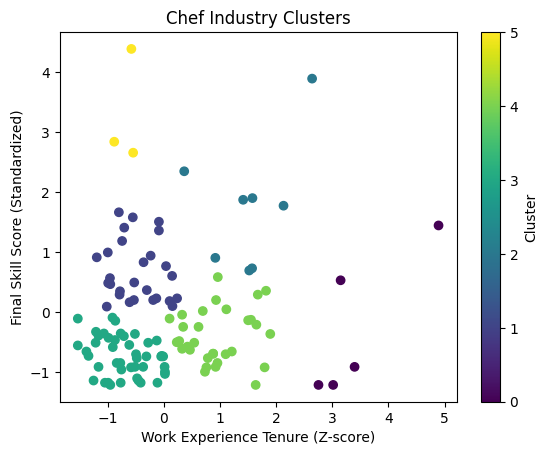

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of two features (you can modify this for your specific features)
plt.scatter(df3['work_experience_tenure_zscore'], df3['final_skill_score_standardized'], c=df3['cluster'], cmap='viridis')

plt.title('Chef Industry Clusters')
plt.colorbar(label='Cluster')
plt.xlabel('Work Experience Tenure (Z-score)')
plt.ylabel('Final Skill Score (Standardized)')
plt.show()


In [ ]:
cluster_means = df3.groupby('cluster').mean()
print(cluster_means)

                   ID  in_top_university  work_experience_tenure  \
cluster                                                            
0        2.716826e+07           0.000000               65.207671   
1        3.300848e+07           0.222222               13.835515   
2        3.449272e+07           0.125000               39.973973   
3        3.166493e+07           0.068182               10.910212   
4        2.699793e+07           0.096774               32.387450   
5        2.414575e+07           0.333333               11.309589   

         work_experience_tenure_zscore  final_skill_score_standardized  \
cluster                                                                  
0                             3.442494                       -0.271396   
1                            -0.475788                        0.674929   
2                             1.517857                        1.766238   
3                            -0.698908                       -0.729142   
4          

<ipython-input-49-780fac060bd8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df3.groupby('cluster').mean()


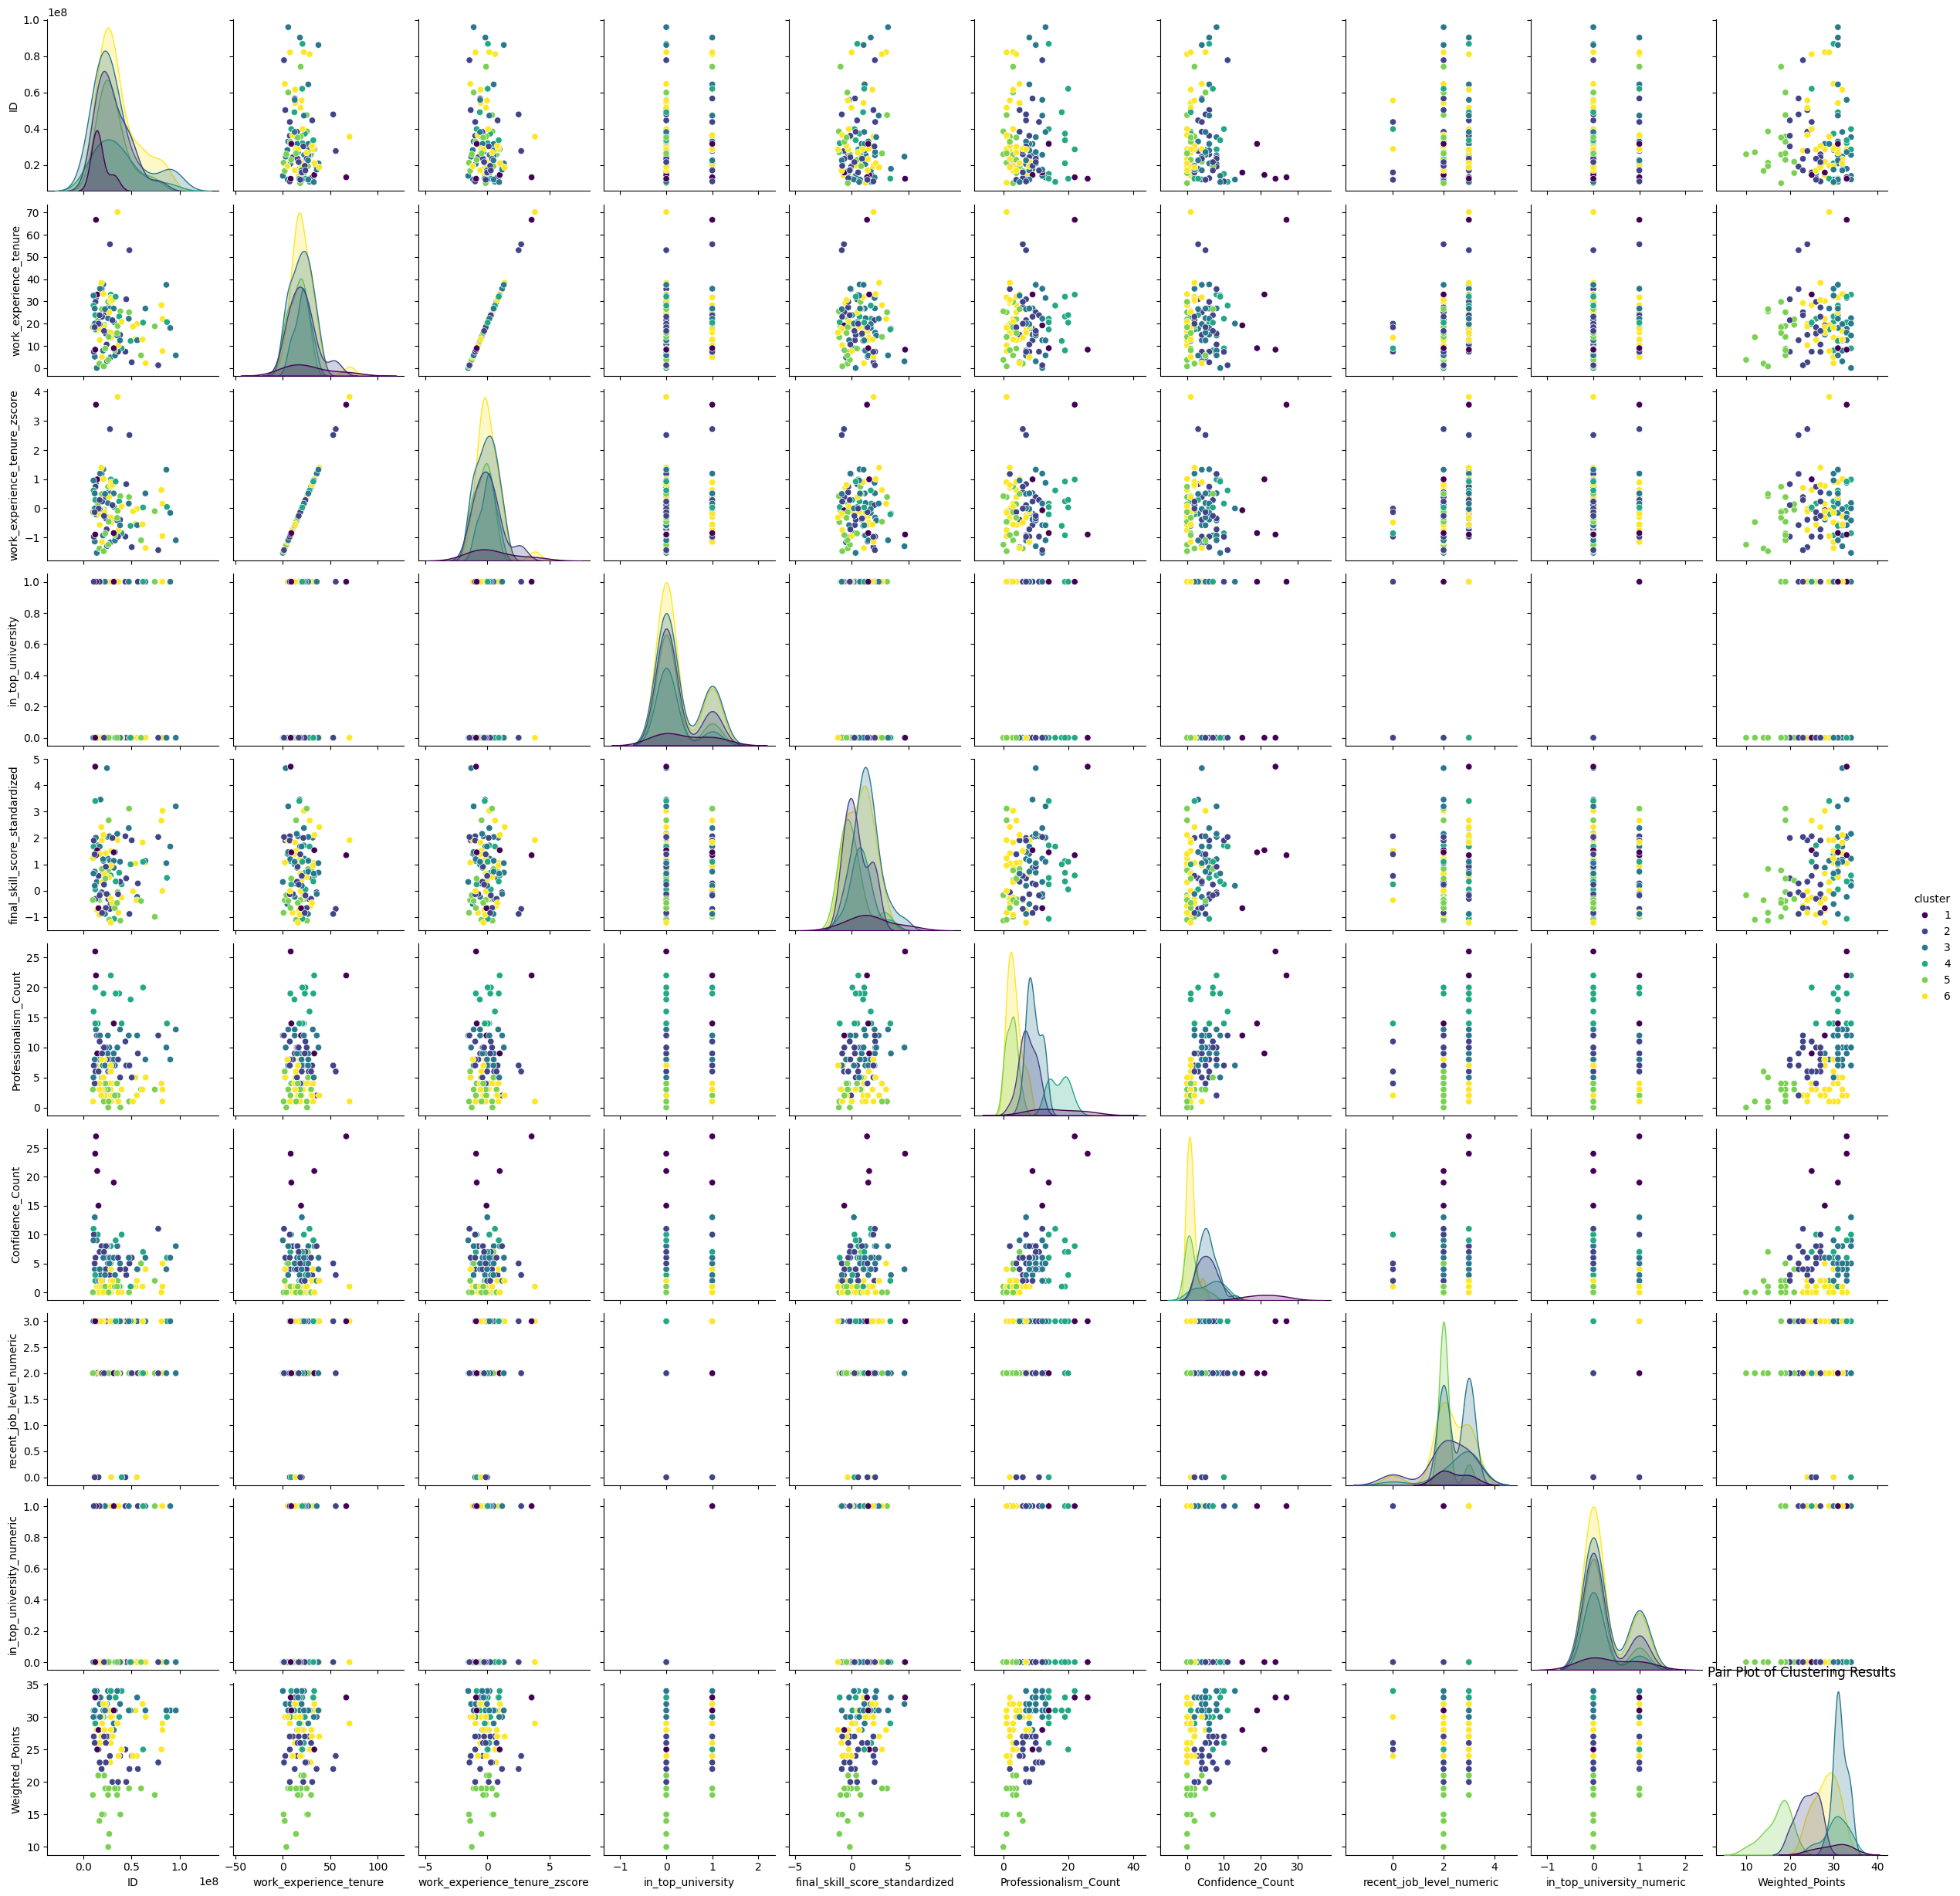

In [ ]:
import seaborn as sns
df4 = df3[['work_experience_tenure_zscore', 'in_top_university_numeric', 'final_skill_score_standardized', 'cluster']]


# Pair plot of selected features colored by cluster label
sns.pairplot(resumes_engineering, palette='viridis', hue = 'cluster') # repace resumes_engineering w df4
plt.title('Pair Plot of Clustering Results')
plt.show()


In [ ]:
# replace the word career with one of the ones in category
career_resume = df[df['Category'] == 'ENGINEERING']
target_words = ['quality', 'project', 'design', 'equip', 'software', 'process', 'team', 'tech', 'develop', 'analy', 'organ', 'lead', 'manag', 'prod', 'test'] # provided in document
# put a number next to the target word based on how much weight you want to give it
# make sure the target words adn words in weights match up
weights = {'quality': 1, 'project': 4, 'design': 2, 'equip': 1, 'software': 3, 'process': 2, 'team': 3,
           'tech': 3, 'develop': 4, 'analy': 3, 'organ': 1, 'lead': 2, 'manag': 2, 'prod': 1, 'test': 2}
weighted_resume = pd.DataFrame({
    'ID': career_resume['ID'],
    'Weighted_Score': career_resume['Resume_str'].apply(
        lambda x: sum(weights[word] for word in target_words if word in x.lower().strip())
    )
})
weighted_scores = weighted_resume['Weighted_Score']
df['Weighted_Points'] = df['ID'].apply(
    lambda id: weighted_resume[weighted_resume['ID'] == id]['Weighted_Score'].iloc[0]
    if id in weighted_resume['ID'].values else None
)

In [ ]:
resumes_engineering = df[df['Category'] == 'ENGINEERING']

In [ ]:
from sklearn.cluster import KMeans
k = 6
kmeans = KMeans(n_clusters = k, random_state = 42)
features = ['work_experience_tenure_zscore', 'final_skill_score_standardized', 'in_top_university', 'Professionalism_Count', 'Confidence_Count', 'recent_job_level_numeric', 'Weighted_Points']
kmeans.fit(resumes_engineering[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
resumes_engineering['cluster'] = kmeans.labels_ + 1
cluster_means = resumes_engineering[features + ['cluster']].groupby('cluster').mean()
print(cluster_means)

         work_experience_tenure_zscore  final_skill_score_standardized  \
cluster                                                                  
1                             0.546062                        1.676112   
2                             0.063570                        0.448909   
3                            -0.064046                        1.304138   
4                             0.055636                        0.871715   
5                            -0.358202                        0.076840   
6                             0.098444                        0.749164   

         in_top_university  Professionalism_Count  Confidence_Count  \
cluster                                                               
1                 0.400000              16.600000         21.200000   
2                 0.227273               7.545455          5.500000   
3                 0.310345               9.413793          5.620690   
4                 0.153846              17.153846   

<ipython-input-27-520d78bbbe86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resumes_engineering['cluster'] = kmeans.labels_ + 1
